In [1]:
# Import work
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

red_wine = (pd.read_csv('winequality-red.csv',  delimiter= ';'))
white_wine = pd.read_csv('winequality-white.csv', delimiter= ';')
all_wine = pd.concat([white_wine, red_wine], ignore_index=True)

In [2]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'Low'
if value <= 5 else 'Medium'
if value <= 7 else 'High')

white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'Low'
if value <= 5 else 'Medium'
if value <= 7 else 'High')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['Low', 'Medium', 'High'])

white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['Low', 'Medium', 'High'])

white_wine = white_wine.assign(wine_type='white')
red_wine = red_wine.assign(wine_type='red')

white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Medium,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Medium,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Medium,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Medium,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Medium,white


In [4]:
rw = pd.DataFrame(red_wine)
ww = pd.DataFrame(white_wine)
aw = pd.DataFrame(all_wine)

ww.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Medium,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Medium,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Medium,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Medium,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Medium,white


In [15]:
for col in ww:
    ww.rename(columns={col: col.lower().replace(' ', '_')}, inplace=True)
print(org)

for col in rw:
    rw.rename(columns={col: col.lower().replace(' ', '_')}, inplace=True)

{}


Text(0.65, 1.25, 'Red Wine Univariate Plots')

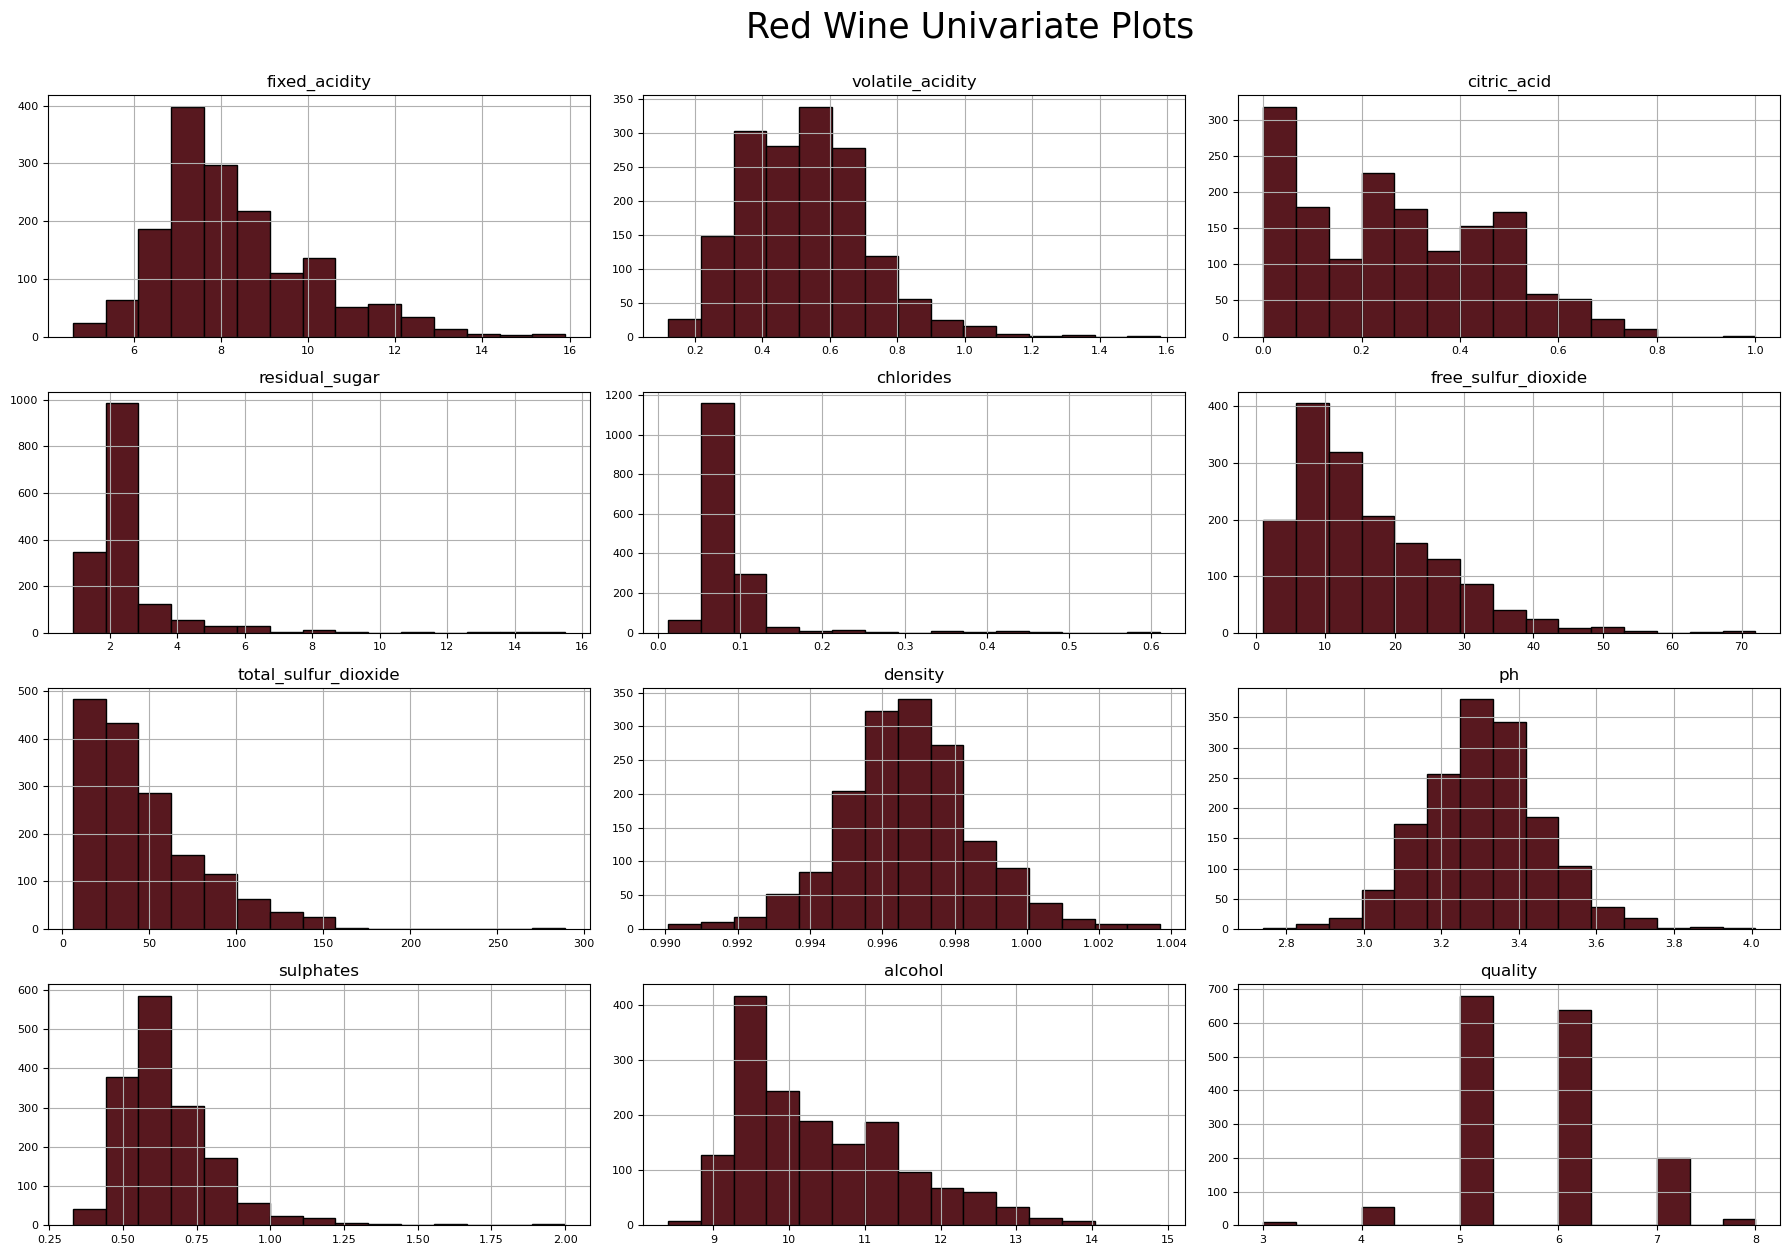

In [19]:
rw.hist(bins=15, color='#58181F', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=True, figsize=(15, 10))

plt.tight_layout(rect=[0, 0, 1.2, 1.2])

plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=25)

Text(0.65, 1.25, 'White Wine Univariate Plots')

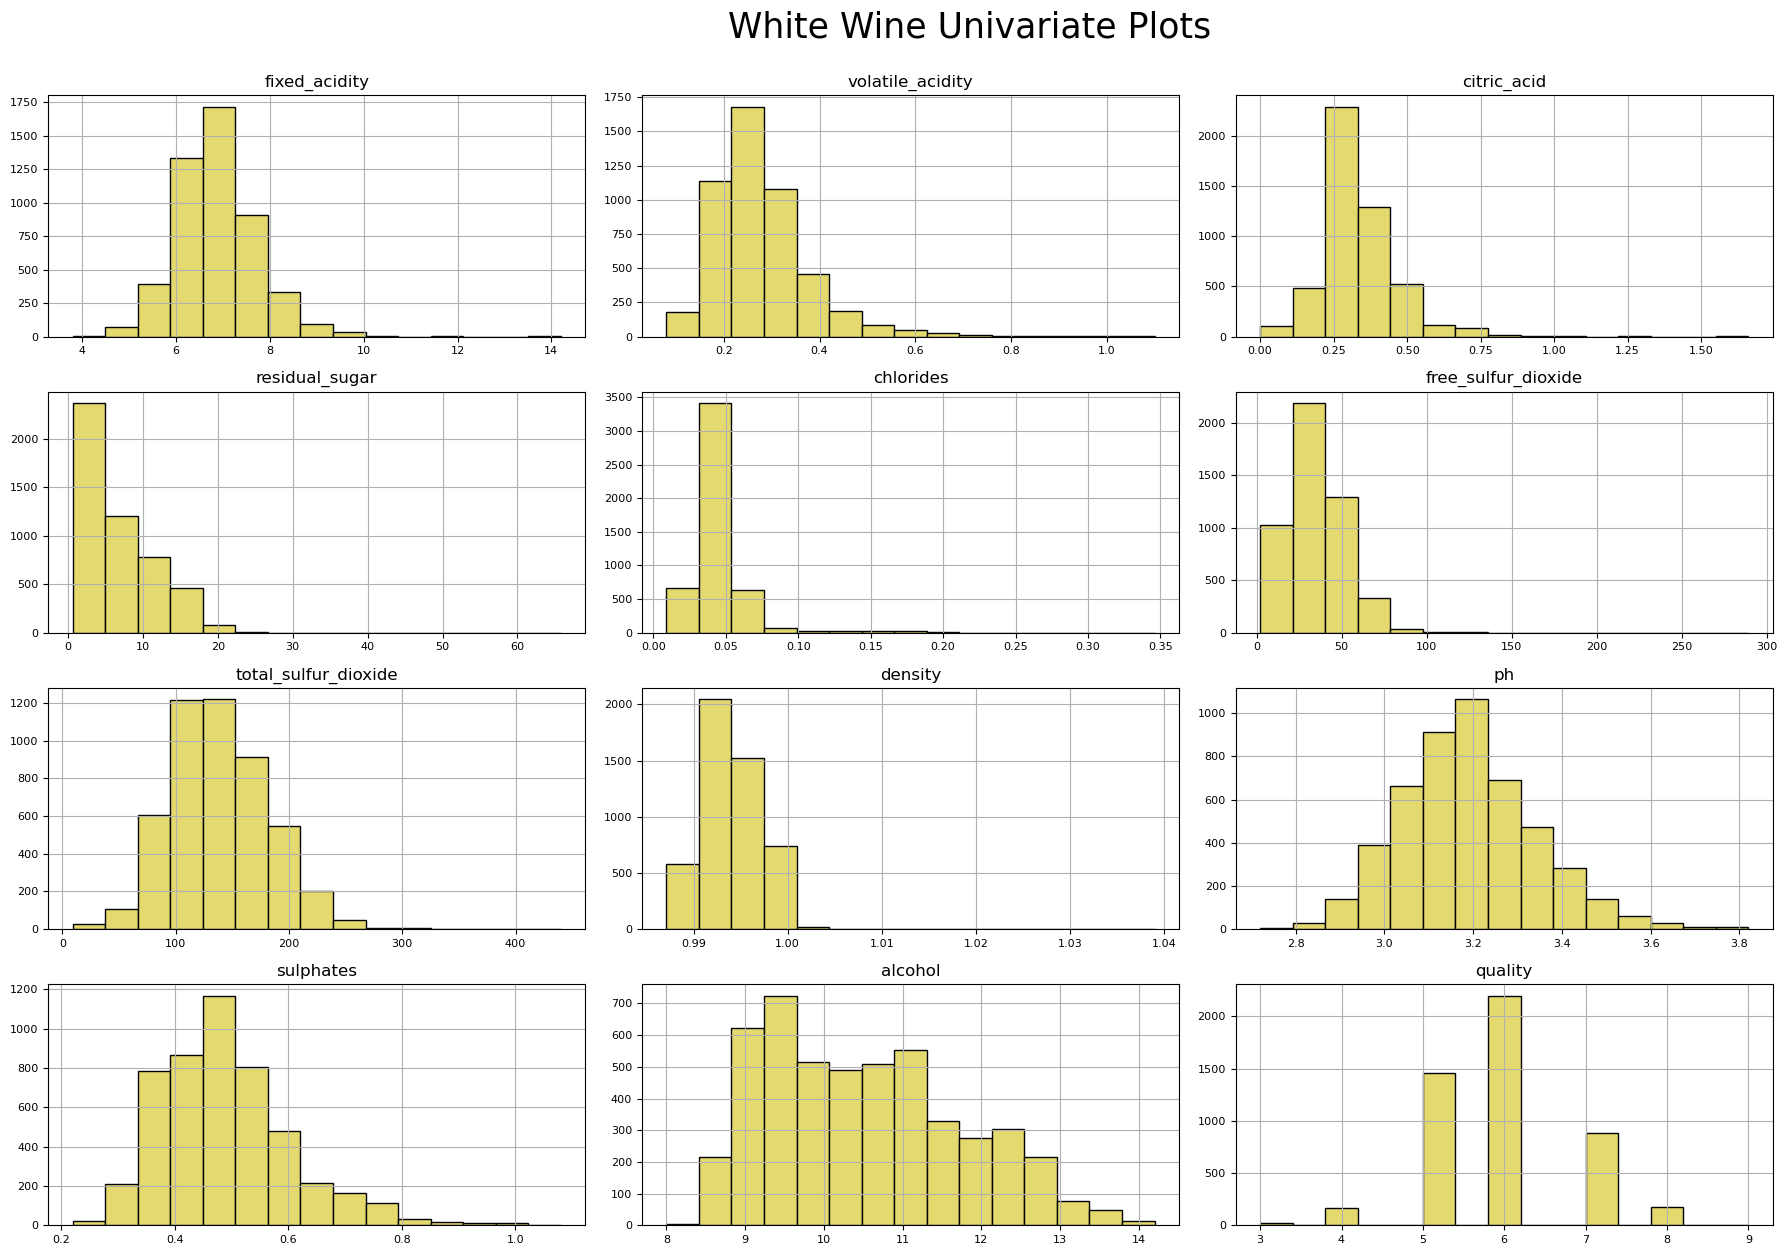

In [20]:
ww.hist(bins=15, color='#E4d96f', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=True, figsize=(15, 10))

plt.tight_layout(rect=[0, 0, 1.2, 1.2])

plt.suptitle('White Wine Univariate Plots', x=0.65, y=1.25, fontsize=25)

Text(0.5, 0.98, 'Residual Sugar Content in Wine')

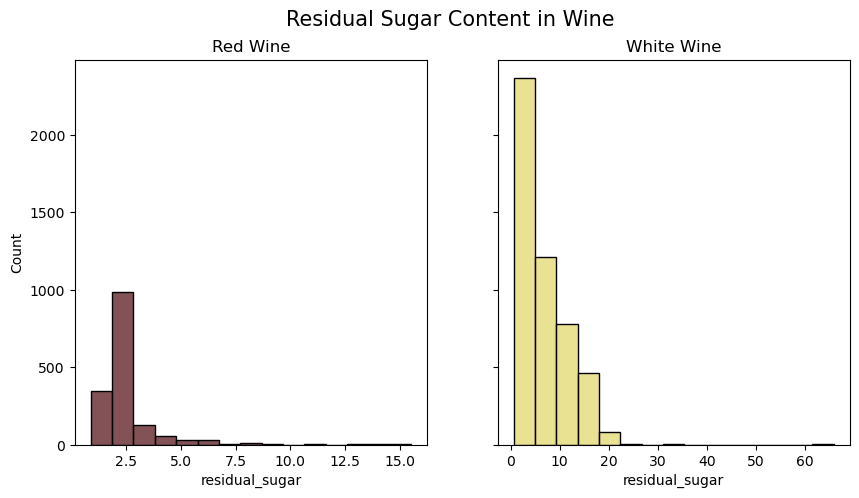

In [40]:
fig, axes = plt.subplots(ncols=2, sharey= True, figsize=(10, 5))

sns.histplot(data=red_wine, x='residual_sugar', bins=15, color= '#58181F', ax=axes[0])
axes[0].set_title('Red Wine')

sns.histplot(data=white_wine, x='residual_sugar', bins=15, color= '#E4d96f', ax=axes[1])
axes[1].set_title('White Wine')

plt.suptitle('Residual Sugar Content in Wine', fontsize= 15)

#sns.histplot(data= ww, bins=15, color='#E4d96f', edgecolor='black', grid=True, figsize=(15, 10))

In [46]:
from scipy import stats

f, p = stats.f_oneway(rw[rw['quality_label'] == 'low']['alcohol'], 
                      rw[rw['quality_label'] == 'medium']['alcohol'], 
                      rw[rw['quality_label'] == 'high']['alcohol'])
print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
print('F Statistic:', f, '\tp-value:', p)

ANOVA test for mean alcohol levels across wine samples with different quality ratings
F Statistic: nan 	p-value: nan
